# Preprocessing 

In [1]:
import pandas as pd
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

import tensorflow as tf
import numpy as np

from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import Sequential, Model
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.metrics import sparse_categorical_accuracy, Precision
from tensorflow.keras.optimizers import Adam, SGD

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import pandas as pd
X_train = pd.read_csv("../input/ahdd1/csvTrainImages 60k x 784/csvTrainImages 60k x 784.csv").values
Y_train = pd.read_csv("../input/ahdd1/csvTrainLabel 60k x 1.csv").values
X_test = pd.read_csv("../input/ahdd1/csvTestImages 10k x 784.csv").values
Y_test = pd.read_csv("../input/ahdd1/csvTestLabel 10k x 1.csv").values


X_train, X_test = (X_train / 255.0), (X_test / 255.0)
X_train = X_train.reshape((59999, 28, 28, 1))
X_test = X_test.reshape((9999, 28, 28,1))

from tensorflow import keras
from tensorflow.keras import layers

# Define input shape
input_shape = (28, 28, 1)

# 1- inception 

In [3]:
inception = keras.Sequential()

# Add first inception block
inception.add(layers.Conv2D(32, kernel_size=(1, 1), activation='relu', input_shape=input_shape))
inception.add(layers.Conv2D(64, (1, 1), activation='relu'))
inception.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
inception.add(layers.Conv2D(64, (5, 5), activation='relu', padding='same'))
inception.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same'))
inception.add(layers.Conv2D(64, (1, 1), activation='relu'))

# Add second inception block
inception.add(layers.Conv2D(64, kernel_size=(1, 1), activation='relu'))
inception.add(layers.Conv2D(128, (1, 1), activation='relu'))
inception.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
inception.add(layers.Conv2D(128, (5, 5), activation='relu', padding='same'))
inception.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same'))
inception.add(layers.Conv2D(128, (1, 1), activation='relu'))

# Add third inception block
inception.add(layers.Conv2D(128, kernel_size=(1, 1), activation='relu'))
inception.add(layers.Conv2D(256, (1, 1), activation='relu'))
inception.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
inception.add(layers.Conv2D(256, (5, 5), activation='relu', padding='same'))
inception.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same'))
inception.add(layers.Conv2D(256, (1, 1), activation='relu'))

# Add dropout layer
inception.add(layers.Dropout(0.25))

# Flatten the output of the inception layers
inception.add(layers.Flatten())

# Add dense layers
inception.add(layers.Dense(512, activation='relu'))
inception.add(layers.Dropout(0.5))
inception.add(layers.Dense(10, activation='softmax'))

In [4]:
optinception = Adam(learning_rate=0.0005)
inception.compile(optimizer=optinception,
              loss=sparse_categorical_crossentropy,
              metrics=[sparse_categorical_accuracy])
inception.fit(X_train, Y_train, epochs=10, batch_size=192)
predsinception = inception.evaluate(X_test, Y_test)

Epoch 1/10


2023-05-16 20:26:03.579201: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


313/313 [==============================] - 73s 187ms/step - loss: 0.2241 - sparse_categorical_accuracy: 0.9254
Epoch 2/10
313/313 [==============================] - 57s 181ms/step - loss: 0.0396 - sparse_categorical_accuracy: 0.9891
Epoch 3/10
313/313 [==============================] - 57s 181ms/step - loss: 0.0310 - sparse_categorical_accuracy: 0.9911
Epoch 4/10
313/313 [==============================] - 57s 181ms/step - loss: 0.0248 - sparse_categorical_accuracy: 0.9925
Epoch 5/10
313/313 [==============================] - 57s 181ms/step - loss: 0.0204 - sparse_categorical_accuracy: 0.9937
Epoch 6/10
313/313 [==============================] - 57s 182ms/step - loss: 0.0178 - sparse_categorical_accuracy: 0.9946
Epoch 7/10
313/313 [==============================] - 57s 181ms/step - loss: 0.0169 - sparse_categorical_accuracy: 0.9950
Epoch 8/10
313/313 [==============================] - 57s 181ms/step - loss: 0.0146 - sparse_categorical_accuracy: 0.9958
Epoch 9/10
313/313 [===============

In [5]:
# predictionsinception = model.predict(X_test[0:1])
# predicted_class_indexinception = np.argmax(predictions, axis=-1)

In [6]:
print("acc",predsinception[1])

acc 0.9916991591453552


In [7]:
y_predinception = inception.predict(X_test)
y_predinception = np.argmax(y_predinception,axis=-1 )

from sklearn.metrics import precision_score, recall_score, f1_score

# y_test is the true labels and y_pred is the predicted labels
precision = precision_score(Y_test, y_predinception, average='macro')
recall = recall_score(Y_test, y_predinception, average='macro')
f1 = f1_score(Y_test, y_predinception, average='macro')

print(f'Precision: {precision:.6f}, Recall: {recall:.6f}, F1-score: {f1:.6f}')


313/313 [==============================] - 4s 11ms/step
Precision: 0.991723, Recall: 0.991699, F1-score: 0.991705


In [8]:
inception.save('inception.h5')


# 2- lenet 5

In [9]:
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
lenet5 = keras.Sequential()

lenet5.add(Conv2D(filters=6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(28, 28, 1)))
lenet5.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))
lenet5.add(Conv2D(filters=16, kernel_size=(5, 5), strides=(1, 1), activation='relu'))
lenet5.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))
lenet5.add(Flatten())
lenet5.add(Dense(units=120, activation='relu'))
lenet5.add(Dense(units=84, activation='relu'))
lenet5.add(Dense(units=10, activation='softmax'))

In [10]:
optlenet5 = Adam(learning_rate=0.001)
lenet5.compile(optimizer=optlenet5,
              loss=sparse_categorical_crossentropy,
              metrics=[sparse_categorical_accuracy])
lenet5.fit(X_train, Y_train, epochs=20, batch_size=128)
predslenet5 = lenet5.evaluate(X_test, Y_test)

Epoch 1/20
469/469 [==============================] - 4s 4ms/step - loss: 0.2814 - sparse_categorical_accuracy: 0.9163
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0800 - sparse_categorical_accuracy: 0.9773
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0532 - sparse_categorical_accuracy: 0.9844
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0406 - sparse_categorical_accuracy: 0.9881
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0330 - sparse_categorical_accuracy: 0.9901
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0269 - sparse_categorical_accuracy: 0.9919
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0234 - sparse_categorical_accuracy: 0.9928
Epoch 8/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0219 - sparse_categorical_accuracy: 0.9933
Epoch 9/20
469/469 [============================

In [11]:
print("acc",predslenet5[1])
y_predlenet5 = lenet5.predict(X_test)
y_predlenet5 = np.argmax(y_predlenet5,axis=-1 )

from sklearn.metrics import precision_score, recall_score, f1_score

# y_test is the true labels and y_pred is the predicted labels
precision = precision_score(Y_test, y_predlenet5, average='macro')
recall = recall_score(Y_test, y_predlenet5, average='macro')
f1 = f1_score(Y_test, y_predlenet5, average='macro')

print(f'Precision: {precision:.6f}, Recall: {recall:.6f}, F1-score: {f1:.6f}')

acc 0.9875987768173218
313/313 [==============================] - 1s 2ms/step
Precision: 0.987680, Recall: 0.987595, F1-score: 0.987572


In [12]:
lenet5.save('lenet5.h5')

# 3- resent 

In [13]:
from keras.models import Model
from tensorflow import keras
from keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense, Add

def res_block(inputs, filters, kernel_size):
    # First convolutional layer
    x = Conv2D(filters=filters, kernel_size=kernel_size, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    # Second convolutional layer
    x = Conv2D(filters=filters, kernel_size=kernel_size, padding='same')(x)
    x = BatchNormalization()(x)
    
    # Skip connection
    skip = Add()([x, inputs])
    
    # Activation
    output = Activation('relu')(skip)
    
    return output

# Input layer
inputs = Input(shape=(28, 28, 1))

# Convolutional block
x = Conv2D(filters=64, kernel_size=(3, 3), padding='same')(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)

# Residual blocks
x = res_block(x, filters=64, kernel_size=(3, 3))
x = res_block(x, filters=64, kernel_size=(3, 3))

# Max pooling layer
x = MaxPooling2D(pool_size=(2, 2))(x)

# Flatten layer
x = Flatten()(x)

# Dense layers
x = Dense(units=128, activation='relu')(x)
outputs = Dense(units=10, activation='softmax')(x)

# Create model
resent = Model(inputs=inputs, outputs=outputs)

In [14]:
optresnet = Adam(learning_rate=0.0001)

resent.compile(
    optimizer=optresnet,
    loss=sparse_categorical_crossentropy,
    metrics=[sparse_categorical_accuracy],
)

resent.fit(X_train, Y_train, epochs=10, batch_size=192)
predsresent = resent.evaluate(X_test, Y_test)

Epoch 1/10
313/313 [==============================] - 12s 28ms/step - loss: 0.1654 - sparse_categorical_accuracy: 0.9558
Epoch 2/10
313/313 [==============================] - 9s 28ms/step - loss: 0.0306 - sparse_categorical_accuracy: 0.9913
Epoch 3/10
313/313 [==============================] - 9s 28ms/step - loss: 0.0181 - sparse_categorical_accuracy: 0.9946
Epoch 4/10
313/313 [==============================] - 9s 28ms/step - loss: 0.0129 - sparse_categorical_accuracy: 0.9963
Epoch 5/10
313/313 [==============================] - 9s 28ms/step - loss: 0.0104 - sparse_categorical_accuracy: 0.9970
Epoch 6/10
313/313 [==============================] - 9s 27ms/step - loss: 0.0091 - sparse_categorical_accuracy: 0.9975
Epoch 7/10
313/313 [==============================] - 9s 28ms/step - loss: 0.0057 - sparse_categorical_accuracy: 0.9984
Epoch 8/10
313/313 [==============================] - 9s 27ms/step - loss: 0.0081 - sparse_categorical_accuracy: 0.9975
Epoch 9/10
313/313 [===================

In [15]:
print("acc",predsresent[1])
y_predresent = resent.predict(X_test)
y_predresent= np.argmax(y_predresent,axis=-1 )

from sklearn.metrics import precision_score, recall_score, f1_score

# y_test is the true labels and y_pred is the predicted labels
precision = precision_score(Y_test, y_predresent, average='macro')
recall = recall_score(Y_test, y_predresent, average='macro')
f1 = f1_score(Y_test, y_predresent, average='macro')

print(f'Precision: {precision:.6f}, Recall: {recall:.6f}, F1-score: {f1:.6f}')

acc 0.9915991425514221
313/313 [==============================] - 1s 2ms/step
Precision: 0.991636, Recall: 0.991599, F1-score: 0.991606


In [16]:
resent.save('resent.h5')

# 4 mobile v2 

In [17]:
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.layers import Input, Dense, GlobalAveragePooling2D
from keras.models import Model

input_tensor = Input(shape=(28, 28, 1))
base_model = MobileNetV2(input_tensor=input_tensor, weights=None, include_top=False)

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

mobilev2 = Model(inputs=base_model.input, outputs=predictions)

In [18]:
optmobilev2 = Adam(learning_rate=0.001)

mobilev2.compile(
  optimizer=optmobilev2,
  loss=sparse_categorical_crossentropy,
  metrics=[sparse_categorical_accuracy],
)

mobilev2.fit(X_train, Y_train, epochs=10, batch_size=192)
predsmobilev2 = mobilev2.evaluate(X_test, Y_test)

Epoch 1/10
313/313 [==============================] - 42s 55ms/step - loss: 0.3572 - sparse_categorical_accuracy: 0.8860
Epoch 2/10
313/313 [==============================] - 17s 55ms/step - loss: 0.0682 - sparse_categorical_accuracy: 0.9808
Epoch 3/10
313/313 [==============================] - 17s 55ms/step - loss: 0.0455 - sparse_categorical_accuracy: 0.9878
Epoch 4/10
313/313 [==============================] - 17s 55ms/step - loss: 0.0381 - sparse_categorical_accuracy: 0.9895
Epoch 5/10
313/313 [==============================] - 17s 54ms/step - loss: 0.0289 - sparse_categorical_accuracy: 0.9923
Epoch 6/10
313/313 [==============================] - 17s 55ms/step - loss: 0.0309 - sparse_categorical_accuracy: 0.9917
Epoch 7/10
313/313 [==============================] - 17s 54ms/step - loss: 0.0307 - sparse_categorical_accuracy: 0.9915
Epoch 8/10
313/313 [==============================] - 17s 55ms/step - loss: 0.0230 - sparse_categorical_accuracy: 0.9940
Epoch 9/10
313/313 [============

In [19]:
print("acc",predsmobilev2[1])

y_predmobilev2 = mobilev2.predict(X_test)
y_predmobilev2= np.argmax(y_predmobilev2,axis=-1 )

from sklearn.metrics import precision_score, recall_score, f1_score

# y_test is the true labels and y_pred is the predicted labels
precision = precision_score(Y_test, y_predmobilev2, average='macro')
recall = recall_score(Y_test, y_predmobilev2, average='macro')
f1 = f1_score(Y_test, y_predmobilev2, average='macro')

print(f'Precision: {precision:.6f}, Recall: {recall:.6f}, F1-score: {f1:.6f}')

acc 0.10001000016927719
313/313 [==============================] - 3s 6ms/step
Precision: 0.010001, Recall: 0.100000, F1-score: 0.018183


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
mobilev2.save('mobilev2.h5')

# 5 Alex net

In [21]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

alex = Sequential()

# Layer 1
alex.add(Conv2D(filters=96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=(28, 28, 1)))
alex.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))

# Layer 2
alex.add(Conv2D(filters=256, kernel_size=(5, 5), padding='same', activation='relu'))
alex.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))

# Layer 3
alex.add(Conv2D(filters=384, kernel_size=(3, 3), padding='same', activation='relu'))

# Layer 4
alex.add(Conv2D(filters=384, kernel_size=(3, 3), padding='same', activation='relu'))

# Layer 5
alex.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
alex.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))

# Layer 6
alex.add(Flatten())
alex.add(Dense(units=4096, activation='relu'))
alex.add(Dropout(0.75))

# Layer 7
alex.add(Dense(units=4096, activation='relu'))
alex.add(Dropout(0.75))

# Layer 8
alex.add(Dense(units=10, activation='softmax'))

In [22]:
optalex = Adam(learning_rate=0.001)

alex.compile(
  optimizer=optalex,
  loss=sparse_categorical_crossentropy,
  metrics=[sparse_categorical_accuracy],
)

alex.fit(X_train, Y_train, epochs=20, batch_size=192)
predsalex = alex.evaluate(X_test, Y_test)

Epoch 1/20
313/313 [==============================] - 8s 17ms/step - loss: 0.6553 - sparse_categorical_accuracy: 0.7511
Epoch 2/20
313/313 [==============================] - 5s 16ms/step - loss: 0.0605 - sparse_categorical_accuracy: 0.9858
Epoch 3/20
313/313 [==============================] - 5s 16ms/step - loss: 0.0433 - sparse_categorical_accuracy: 0.9904
Epoch 4/20
313/313 [==============================] - 5s 16ms/step - loss: 0.0380 - sparse_categorical_accuracy: 0.9911
Epoch 5/20
313/313 [==============================] - 5s 16ms/step - loss: 0.0372 - sparse_categorical_accuracy: 0.9923
Epoch 6/20
313/313 [==============================] - 5s 16ms/step - loss: 0.0316 - sparse_categorical_accuracy: 0.9927
Epoch 7/20
313/313 [==============================] - 5s 16ms/step - loss: 0.0289 - sparse_categorical_accuracy: 0.9931
Epoch 8/20
313/313 [==============================] - 5s 16ms/step - loss: 0.0260 - sparse_categorical_accuracy: 0.9941
Epoch 9/20
313/313 [====================

In [23]:
print("acc",predsalex[1])
y_predalex = alex.predict(X_test)
y_predalex= np.argmax(y_predalex,axis=-1 )

from sklearn.metrics import precision_score, recall_score, f1_score

# y_test is the true labels and y_pred is the predicted labels
precision = precision_score(Y_test, y_predalex, average='macro')
recall = recall_score(Y_test, y_predalex, average='macro')
f1 = f1_score(Y_test, y_predalex, average='macro')

print(f'Precision: {precision:.6f}, Recall: {recall:.6f}, F1-score: {f1:.6f}')

acc 0.9883988499641418
313/313 [==============================] - 1s 3ms/step
Precision: 0.988461, Recall: 0.988398, F1-score: 0.988415


In [24]:
alex.save('alex.h5')

# 6 dense net

In [25]:
Densemodel = Sequential()
Densemodel.add(Flatten(input_shape=(28, 28, 1)))
Densemodel.add(Dense(512, activation='relu'))
Densemodel.add(Dense(256, activation='relu'))
Densemodel.add(Dense(128, activation='relu'))
Densemodel.add(Dense(64, activation='relu'))
Densemodel.add(Dense(32, activation='relu'))
Densemodel.add(Dense(16, activation='relu'))
Densemodel.add(Dense(10, activation='softmax'))

# Densemodel.summary()

In [26]:
Densemodelopt = Adam(learning_rate=0.0005)


Densemodel.compile(
    optimizer=Densemodelopt,
    loss=sparse_categorical_crossentropy,
    metrics=[sparse_categorical_accuracy],
)

Densemodel.fit(X_train, Y_train, epochs=10, batch_size=192)
predsDensemodel = Densemodel.evaluate(X_test, Y_test)

Epoch 1/10
313/313 [==============================] - 3s 4ms/step - loss: 0.3323 - sparse_categorical_accuracy: 0.9104
Epoch 2/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0697 - sparse_categorical_accuracy: 0.9816
Epoch 3/10
313/313 [==============================] - 1s 4ms/step - loss: 0.0445 - sparse_categorical_accuracy: 0.9880
Epoch 4/10
313/313 [==============================] - 2s 5ms/step - loss: 0.0301 - sparse_categorical_accuracy: 0.9918
Epoch 5/10
313/313 [==============================] - 1s 4ms/step - loss: 0.0214 - sparse_categorical_accuracy: 0.9941
Epoch 6/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0152 - sparse_categorical_accuracy: 0.9957
Epoch 7/10
313/313 [==============================] - 1s 4ms/step - loss: 0.0128 - sparse_categorical_accuracy: 0.9962
Epoch 8/10
313/313 [==============================] - 1s 4ms/step - loss: 0.0124 - sparse_categorical_accuracy: 0.9961
Epoch 9/10
313/313 [============================

In [27]:
print("acc",predsDensemodel[1])
y_preddense = Densemodel.predict(X_test)
y_preddense= np.argmax(y_preddense,axis=-1 )

from sklearn.metrics import precision_score, recall_score, f1_score

# y_test is the true labels and y_pred is the predicted labels
precision = precision_score(Y_test, y_preddense, average='macro')
recall = recall_score(Y_test, y_preddense, average='macro')
f1 = f1_score(Y_test, y_preddense, average='macro')

print(f'Precision: {precision:.6f}, Recall: {recall:.6f}, F1-score: {f1:.6f}')

acc 0.9812981486320496
313/313 [==============================] - 1s 2ms/step
Precision: 0.981450, Recall: 0.981297, F1-score: 0.981329


In [28]:
Densemodel.save('Densemodel.h5')


In [29]:
# import time
# from tensorflow.keras.models import load_model

# model1 = load_model('path/to/saved/model')
# model2 = load_model('path/to/saved/model')
# model3 = load_model('path/to/saved/model')
# model4 = load_model('path/to/saved/model')
# model5 = load_model('path/to/saved/model')
# model6 = load_model('path/to/saved/model')


# start_time = time.time() # start the timer





# end_time = time.time() # stop the timer

# elapsed_time = end_time - start_time
# print("Elapsed time: ", elapsed_time, "seconds")

In [30]:
mv2 = mobilev2.predict(X_test)
lenet55 = lenet5.predict(X_test)
resesent = resent.predict(X_test)
inince = inception.predict(X_test)
allllex = alex.predict(X_test)
dense = Densemodel.predict(X_test)
# np.argmax(p, axis=-1)


313/313 [==============================] - 1s 2ms/step


In [31]:
alex = np.argmax(allllex,axis=-1 )
mv2 = np.argmax(mv2, axis=-1)
lenet55 = np.argmax(lenet55, axis=-1)
resesent = np.argmax(resesent, axis=-1)
inincem = np.argmax(inince, axis=-1)
dense = np.argmax(dense, axis=-1)
print(mv2.shape)

(9999,)


In [32]:
re = np.array([], dtype=int)
from collections import Counter
print(X_test.shape)
for i in range((X_test.shape[0])):
    first_elems = [mv2[i], lenet55[i], resesent[i], alex[i], inincem[i], dense[i]]

    most_common_first_elem = Counter(first_elems).most_common(1)[0][0]
    
    re = np.append(re, most_common_first_elem)

#     print(most_common_first_elem)
print(re)

(9999, 28, 28, 1)
[1 2 3 ... 7 8 9]


In [33]:
mask = (re == np.squeeze(Y_test))
common_values = re[mask]

# Print the common values and their length
print("Common values:", common_values)
print("Number of common values:", len(common_values))

# print(np.squeeze(Y_test).shape)

Common values: [1 2 3 ... 7 8 9]
Number of common values: 9919


In [34]:
print(common_values.shape)

(9919,)


In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score

# y_test is the true labels and y_pred is the predicted labels
precision = precision_score(Y_test, re, average='macro')
recall = recall_score(Y_test, re, average='macro')
f1 = f1_score(Y_test, re, average='macro')

print(f'Precision: {precision:.6f}, Recall: {recall:.6f}, F1-score: {f1:.6f}')


Precision: 0.992006, Recall: 0.991998, F1-score: 0.992000


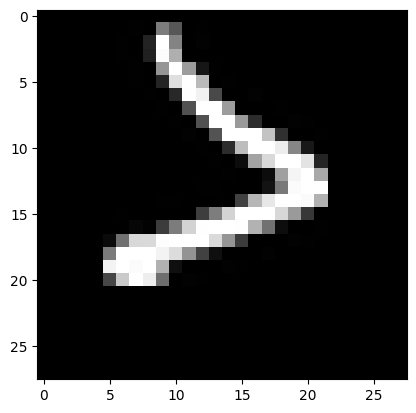

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(X_test[6], cmap='gray')
plt.show()


In [37]:
import time
from tensorflow.keras.models import load_model

model1 = load_model('/kaggle/working/resent.h5')
model2 = load_model('/kaggle/working/lenet5.h5')
model3 = load_model('/kaggle/working/Densemodel.h5')
model4 = load_model('/kaggle/working/inception.h5')
model5 = load_model('/kaggle/working/mobilev2.h5')
model6 = load_model('/kaggle/working/alex.h5')

In [38]:
start_time = time.time() # start the timer
model2.predict(X_test[0:1])
end_time = time.time() # stop the timer

elapsed_time = end_time - start_time
print("Elapsed time: ", elapsed_time, "seconds")


# model1.predict(X_test[0:1])
# model2.predict(X_test[0:1])
# model3.predict(X_test[0:1])
# model4.predict(X_test[0:1])
# model5.predict(X_test[0:1])
# model6.predict(X_test[0:1])

1/1 [==============================] - 0s 78ms/step
Elapsed time:  0.12549257278442383 seconds
